# Setup

## Basic Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt #for displaying plots
import pandas as pd
import seaborn as sns
import tensorflow as tf

from keras.layers import *
from keras.models import Sequential
from keras.models import Model
from keras.optimizers import *
from keras.callbacks import *
from keras import regularizers
from keras.utils import plot_model

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.inspection import permutation_importance
import datetime
import random
import properscoring as ps

from scipy.stats import norm

import shap
import xgboost
import pydot
import graphviz
import os
from pathlib import Path

In [2]:
# setting a seed to ensure reproducability and consistency
random.seed(16)
np.random.seed(16)
tf.random.set_seed(16)

In [3]:
# Change Working Directory
os.chdir("..")
print(os.getcwd()) # print current working directory

c:\Users\aisti\OneDrive\Dokumente\Uni\Bachelorarbeit\Probabilistic-Forecasting-of-Bicycle-Counts-in-Karlsruhe-with-Neural-Networks


In [4]:
plt.rcParams.update({'font.size': 14})

In [5]:
X_train = pd.read_pickle(r"data\X_train.pkl")
X_valid = pd.read_pickle(r"data\X_valid.pkl")
X_test = pd.read_pickle(r"data\X_test.pkl")

X_train_num = pd.read_pickle(r"data\X_train_num.pkl")
X_valid_num = pd.read_pickle(r"data\X_valid_num.pkl")
X_test_num = pd.read_pickle(r"data\X_test_num.pkl")

y_train = pd.read_pickle(r"data\y_train.pkl")
y_valid = pd.read_pickle(r"data\y_valid.pkl")
y_test = pd.read_pickle(r"data\y_test.pkl")

In [6]:
X_train['date'] =  pd.to_datetime(X_train['date'])
X_valid['date'] =  pd.to_datetime(X_valid['date'])
X_test['date'] =  pd.to_datetime(X_test['date'])

In [7]:
base_path_plots = Path("Figures\(10) Feature_Selection")

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
C:\Users\aisti\AppData\Local\Temp\ipykernel_35028\2205385676.py:1: SyntaxWarning: invalid escape sequence '\('
  base_path_plots = Path("Figures\(10) Feature_Selection")


In [8]:
X_train.head()

,date,temperature,humidity,windspeed,wind_direction,visibility,precipitation,sun,windspeed_max,precip_indic,school_holiday,school_holiday_indicator,public_holiday,public_holiday_indicator,holiday_indicator,is_workday,season,day_of_week
0,2012-04-25,-0.039776,-0.645081,-0.218119,0.079113,1.461434,-0.397192,-0.031329,0.665623,0,No Holiday,0,No Holiday,0,0,1,0,2
1,2012-04-26,0.244625,-0.607815,-0.324284,1.042128,1.392951,-0.397192,-0.458165,0.154228,0,No Holiday,0,No Holiday,0,0,1,0,3
2,2012-04-27,0.381694,-0.417343,-1.076810,0.831722,0.906360,-0.371451,0.254435,-1.124262,1,No Holiday,0,No Holiday,0,0,1,0,4
3,2012-04-28,1.300863,-1.551894,-0.405469,-0.349793,0.675680,-0.397192,1.357699,-0.357168,0,No Holiday,0,No Holiday,0,0,0,0,5
4,2012-04-29,0.745990,-0.897664,0.297096,0.532297,1.407369,0.555250,0.059103,1.688415,1,No Holiday,0,No Holiday,0,0,0,0,6


In [9]:
X_valid.tail()

,date,temperature,humidity,windspeed,wind_direction,visibility,precipitation,sun,windspeed_max,precip_indic,school_holiday,school_holiday_indicator,public_holiday,public_holiday_indicator,holiday_indicator,is_workday,season,day_of_week
359,2022-12-27,-1.064496,0.559862,-0.258711,0.499927,1.588705,-0.397192,-0.353265,-0.408308,0,weihnachtsferien,1,No Holiday,0,1,1,3,1
360,2022-12-28,-0.478837,-0.529141,1.087091,0.637500,2.515281,-0.397192,-0.823509,0.563344,0,weihnachtsferien,1,No Holiday,0,1,1,3,2
361,2022-12-29,-0.104279,-0.185464,2.276769,0.637500,2.110005,0.143383,-0.913940,1.739554,1,weihnachtsferien,1,No Holiday,0,1,1,3,3
362,2022-12-30,-0.691404,1.127138,-0.674006,0.265242,0.451524,0.169125,-0.508807,1.739554,1,weihnachtsferien,1,No Holiday,0,1,1,3,4
363,2022-12-31,0.541485,-0.727895,1.564836,0.597037,2.650446,-0.397192,-0.201340,1.458287,0,weihnachtsferien,1,No Holiday,0,1,0,3,5


In [10]:
X_train_num.head()

,temperature,humidity,windspeed,wind_direction,visibility,precipitation,sun,windspeed_max,precip_indic,school_holiday_indicator,public_holiday_indicator,holiday_indicator,is_workday,season,day_of_week
0,-0.039776,-0.645081,-0.218119,0.079113,1.461434,-0.397192,-0.031329,0.665623,0,0,0,0,1,0,2
1,0.244625,-0.607815,-0.324284,1.042128,1.392951,-0.397192,-0.458165,0.154228,0,0,0,0,1,0,3
2,0.381694,-0.417343,-1.076810,0.831722,0.906360,-0.371451,0.254435,-1.124262,1,0,0,0,1,0,4
3,1.300863,-1.551894,-0.405469,-0.349793,0.675680,-0.397192,1.357699,-0.357168,0,0,0,0,0,0,5
4,0.745990,-0.897664,0.297096,0.532297,1.407369,0.555250,0.059103,1.688415,1,0,0,0,0,0,6


In [11]:
y_test.head()

0    1160.0
1    2996.0
2    3635.0
3    3265.0
4    3751.0
Name: bike_count, dtype: float64

In [12]:
X_train.shape, X_valid.shape, X_test.shape

((3161, 18), (364, 18), (390, 18))

In [13]:
X_train_num.shape, X_valid_num.shape, X_test_num.shape

((3161, 15), (364, 15), (390, 15))

In [14]:
y_train.shape, y_valid.shape, y_test.shape

((3161,), (364,), (390,))

In [15]:
y_train = y_train.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [16]:
y_train.shape, y_valid.shape, y_test.shape

((3161,), (364,), (390,))

In [17]:
X_train.isna().sum()

date                        0
temperature                 0
humidity                    0
windspeed                   0
wind_direction              0
visibility                  0
precipitation               0
sun                         0
windspeed_max               0
precip_indic                0
school_holiday              0
school_holiday_indicator    0
public_holiday              0
public_holiday_indicator    0
holiday_indicator           0
is_workday                  0
season                      0
day_of_week                 0
dtype: int64

In [18]:
X_train_num.isna().sum()

temperature                 0
humidity                    0
windspeed                   0
wind_direction              0
visibility                  0
precipitation               0
sun                         0
windspeed_max               0
precip_indic                0
school_holiday_indicator    0
public_holiday_indicator    0
holiday_indicator           0
is_workday                  0
season                      0
day_of_week                 0
dtype: int64

In [19]:
X_train.dtypes

date                        datetime64[ns]
temperature                        float64
humidity                           float64
windspeed                          float64
wind_direction                     float64
visibility                         float64
precipitation                      float64
sun                                float64
windspeed_max                      float64
precip_indic                         int64
school_holiday                      object
school_holiday_indicator             int64
public_holiday                      object
public_holiday_indicator             int64
holiday_indicator                    int64
is_workday                           int64
season                               int64
day_of_week                          int64
dtype: object

In [20]:
X_train.describe()

,date,temperature,humidity,windspeed,wind_direction,visibility,precipitation,sun,windspeed_max,precip_indic,school_holiday_indicator,public_holiday_indicator,holiday_indicator,is_workday,season,day_of_week
count,3161,3.161000e+03,3.161000e+03,3.161000e+03,3.161000e+03,3.161000e+03,3.161000e+03,3.161000e+03,3.161000e+03,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000
mean,2016-10-06 22:22:03.378677504,4.450726e-16,-3.281849e-16,4.832859e-17,1.719599e-16,-1.078964e-16,3.708939e-17,4.720467e-17,-1.185736e-16,0.401772,0.232521,0.033534,0.248972,0.684910,1.492249,3.001898
min,2012-04-25 00:00:00,-2.660948e+00,-3.112937e+00,-1.513961e+00,-2.348657e+00,-2.003308e+00,-3.971923e-01,-1.094803e+00,-1.891355e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014-06-24 00:00:00,-7.932892e-01,-7.651612e-01,-7.364558e-01,-6.573103e-01,-8.238480e-01,-3.971923e-01,-9.899026e-01,-6.384357e-01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2016-08-22 00:00:00,-9.270793e-04,9.610389e-02,-2.056287e-01,4.432786e-01,3.399334e-02,-3.971923e-01,-2.085744e-01,-1.014702e-01,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000
75%,2018-11-02 00:00:00,7.907021e-01,7.793190e-01,4.969366e-01,7.507961e-01,7.585809e-01,-1.140338e-01,8.585175e-01,5.122046e-01,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,5.000000
max,2022-01-01 00:00:00,2.566737e+00,1.918011e+00,4.952762e+00,2.361217e+00,2.407294e+00,1.461021e+01,2.193287e+00,5.523883e+00,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,6.000000
std,NaN,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,0.490334,0.422506,0.180054,0.432486,0.464625,1.101504,2.001106


## Functions

In [21]:
def add_column(X_train_num, X_valid_num, X_test_num, X_train, X_valid, X_test, col_name):
    
    X_train_num[col_name] = X_train[col_name]
    X_valid_num[col_name] = X_valid[col_name]
    X_test_num[col_name] = X_test[col_name]
    
    return X_train_num, X_valid_num, X_test_num

In [22]:
def crps_normal_cost_function(y_true, y_pred, tensor=True):
    """Compute the CRPS cost function for a normal distribution defined by
    the mean and standard deviation.

    Args:
        y_true: True values
        y_pred: Tensor containing predictions: [mean, std]

    Returns:
        mean_crps: Scalar with mean CRPS over batch or tensor with all crps values of batch
    """
    # get rid of axis 1
    if tensor:
        y_true = y_true[:, 0]
    
    # Split input
    mu = y_pred[:, 0]
    var = tf.square(y_pred[:, 1]) # Ensure standard deviation is positive
    sigma = tf.sqrt(var)  
    #sigma = y_pred[:, 1]

    # The following three variables are just for convenience
    loc = (y_true - mu) / sigma
    phi = 1.0 / tf.sqrt(2.0 * np.pi) * tf.exp(-tf.square(loc) / 2.0)
    Phi = 0.5 * (1.0 + tf.math.erf(loc / tf.sqrt(2.0)))
    # First we will compute the crps for each input/target pair
    crps =  sigma * (loc * (2. * Phi - 1.) + 2 * phi - 1. / tf.sqrt(np.pi))

    # Then we take the mean. The cost is now a scalar
    return tf.reduce_mean(crps) if tensor else crps

In [23]:
def crps_normal_cost_function_v2(y_true, y_pred, tensor=True):
    """Compute the CRPS cost function for a normal distribution defined by
    the mean and standard deviation.

    Args:
        y_true: True values
        y_pred: Tensor containing predictions: [mean, std]

    Returns:
        mean_crps: Scalar with mean CRPS over batch or tensor with all crps values of batch
    """
    # get rid of axis 1
    if tensor:
        y_true = y_true[:, 0]

    # Split input
    mu = y_pred[:, 0]
    sigma = tf.math.softplus(y_pred[:, 1])  # Apply softplus to ensure positive std
    #sigma = y_pred[:, 1]

    # The following three variables are just for convenience
    loc = (y_true - mu) / sigma
    phi = 1.0 / tf.sqrt(2.0 * np.pi) * tf.exp(-tf.square(loc) / 2.0)
    Phi = 0.5 * (1.0 + tf.math.erf(loc / tf.sqrt(2.0)))
    # First we will compute the crps for each input/target pair
    crps =  sigma * (loc * (2. * Phi - 1.) + 2 * phi - 1. / tf.sqrt(np.pi))
    
    # Then we take the mean. The cost is now a scalar
    return tf.reduce_mean(crps) if tensor else crps

In [24]:
def predict_and_calculate_mean_crps(model, X_test = X_test_num, y_test = y_test, print_predicted_mean_std = False):
    """Make predictions on test data and calculate mean CRPS.

    Args:
        model: Trained model
        X_test: Test data
        y_test: True values
        print_predicted_mean_std: Boolean to print predicted mean and std

    Returns:
        mean_crps: Scalar with mean CRPS over batch or tensor with all crps values of batch
    """
     
    predicted_mean_std = model.predict(X_test)
    if print_predicted_mean_std:
        print(predicted_mean_std)
    
    predicted_mean = predicted_mean_std[:, 0]
    predicted_std = predicted_mean_std[:, 1]
    mean_crps = np.mean(ps.crps_gaussian(y_test, mu=predicted_mean, sig=predicted_std))
    print(f"\nMean CRPS: { mean_crps }")


    return mean_crps, predicted_mean_std

In [25]:
def compile_and_fit_model(model, X_train = X_train_num, y_train = y_train, X_valid = X_valid_num, y_valid = y_valid,  pat=5, lr=1e-3, loss_function = crps_normal_cost_function, epochs = 100, batch_size = 10):
    """Compile and fit a model on training data.

    Args:
        model: model to be trained
        X_train: Training data
        y_train: Training targets
        X_valid: Validation data
        y_valid: Validation targets
        pat: Patience for early stopping
        lr: Learning rate
        loss_function: Loss function
        epochs: Number of epochs
        batch_size: Batch size

    Returns:
        model: Trained model
    """

    #print some information about the model
    print('Model information:\n\nCallbacks: EarlyStopping (patience: ' + str(pat) + '), Learning Rate (Reduce on Plateau, patience: ' + str(pat) + ')\nBatch size: ' + str(batch_size) + '\nEpochs: ' + str(epochs) + '\n')
    
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=pat, 
                                                      restore_best_weights=True)
    
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                     factor=0.2,
                                                     patience = pat,
                                                     min_lr=0 )
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss=loss_function)

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_valid, y_valid), callbacks=[early_stopping, reduce_lr])

    return model, history

In [26]:
def plot_loss(history):
    """Plot training and validation loss.

    Args:
        history: History object
    """
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [27]:
def process_model(model, X_train = X_train_num, y_train = y_train, X_valid = X_valid_num, y_valid = y_valid,  X_test = X_test_num, y_test = y_test, pat=5, lr=1e-3, loss_function = crps_normal_cost_function, epochs = 100, batch_size = 10, print_predicted_mean_std = False, plot_loss_flag = True):
    """Compile, fit and evaluate a model.

    Args:
        model: model to be trained
        X_train: Training data
        y_train: Training targets
        X_valid: Validation data
        y_valid: Validation targets
        X_test: Test data
        y_test: Test targets
        pat: Patience for early stopping
        lr: Learning rate
        loss_function: Loss function
        epochs: Number of epochs
        batch_size: Batch size
        print_predicted_mean_std: Boolean to print predicted mean and std
"""

    model, history = compile_and_fit_model(model, X_train, y_train, X_valid, y_valid,  pat, lr, loss_function, epochs, batch_size)

    mean_crps, predicted_mean_std = predict_and_calculate_mean_crps(model, X_test, y_test, print_predicted_mean_std)

    if plot_loss_flag:
        plot_loss(history)

    return model, mean_crps, history, predicted_mean_std

## One-Hot Encoding the Season Column

In [28]:
#One-hot encoding the season column
season_encoder = OneHotEncoder(sparse_output=False)

# Fit the encoder on the training data and transform the training, validation, and test data
season_train_encoded = season_encoder.fit_transform(X_train_num[['season']])
season_valid_encoded = season_encoder.transform(X_valid_num[['season']])
seasons_test_encoded = season_encoder.transform(X_test_num[['season']])

# Convert the encoded columns to DataFrame
seasons_train_encoded_df = pd.DataFrame(season_train_encoded, columns=season_encoder.get_feature_names_out(['season']))
seasons_valid_encoded_df = pd.DataFrame(season_valid_encoded, columns=season_encoder.get_feature_names_out(['season']))
seasons_test_encoded_df = pd.DataFrame(seasons_test_encoded, columns=season_encoder.get_feature_names_out(['season']))

# Concatenate the encoded columns back to the original dataframes
X_train_num = pd.concat([X_train_num.reset_index(drop=True), seasons_train_encoded_df], axis=1)
X_valid_num = pd.concat([X_valid_num.reset_index(drop=True), seasons_valid_encoded_df], axis=1)
X_test_num = pd.concat([X_test_num.reset_index(drop=True), seasons_test_encoded_df], axis=1)

# Drop the original 'seasons' column
X_train_num.drop(columns=['season'], inplace=True)
X_valid_num.drop(columns=['season'], inplace=True)
X_test_num.drop(columns=['season'], inplace=True)

X_train = pd.concat([X_train.reset_index(drop=True), seasons_train_encoded_df], axis=1)
X_valid = pd.concat([X_valid.reset_index(drop=True), seasons_valid_encoded_df], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), seasons_test_encoded_df], axis=1)

X_train.drop(columns=['season'], inplace=True)
X_valid.drop(columns=['season'], inplace=True)
X_test.drop(columns=['season'], inplace=True)


In [29]:
season_encoder.categories_[0].tolist()

[0, 1, 2, 3]

In [30]:
X_train_num.tail()

,temperature,humidity,windspeed,wind_direction,visibility,precipitation,sun,windspeed_max,precip_indic,school_holiday_indicator,public_holiday_indicator,holiday_indicator,is_workday,day_of_week,season_0,season_1,season_2,season_3
3156,-0.335171,0.737912,1.546101,0.564667,0.519395,2.872001,-1.094803,2.915764,1,1,0,1,1,1,0.0,0.0,0.0,1.0
3157,-0.389412,1.284484,1.183889,0.807444,0.235983,0.297833,-1.094803,0.972461,1,1,0,1,1,2,0.0,0.0,0.0,1.0
3158,0.183053,1.135419,1.211992,0.734611,1.887147,-0.319967,-1.087569,0.435495,1,1,0,1,1,3,0.0,0.0,0.0,1.0
3159,-0.530879,1.574333,-0.599065,0.548482,-0.621426,-0.397192,-0.190488,-0.331598,0,1,0,1,1,4,0.0,0.0,0.0,1.0
3160,-0.453182,1.052605,-1.151750,0.427093,-0.402028,-0.397192,0.178472,-1.252111,0,1,1,1,0,5,0.0,0.0,0.0,1.0


In [31]:
X_train.head()

,date,temperature,humidity,windspeed,wind_direction,visibility,precipitation,sun,windspeed_max,precip_indic,...,school_holiday_indicator,public_holiday,public_holiday_indicator,holiday_indicator,is_workday,day_of_week,season_0,season_1,season_2,season_3
0,2012-04-25,-0.039776,-0.645081,-0.218119,0.079113,1.461434,-0.397192,-0.031329,0.665623,0,...,0,No Holiday,0,0,1,2,1.0,0.0,0.0,0.0
1,2012-04-26,0.244625,-0.607815,-0.324284,1.042128,1.392951,-0.397192,-0.458165,0.154228,0,...,0,No Holiday,0,0,1,3,1.0,0.0,0.0,0.0
2,2012-04-27,0.381694,-0.417343,-1.076810,0.831722,0.906360,-0.371451,0.254435,-1.124262,1,...,0,No Holiday,0,0,1,4,1.0,0.0,0.0,0.0
3,2012-04-28,1.300863,-1.551894,-0.405469,-0.349793,0.675680,-0.397192,1.357699,-0.357168,0,...,0,No Holiday,0,0,0,5,1.0,0.0,0.0,0.0
4,2012-04-29,0.745990,-0.897664,0.297096,0.532297,1.407369,0.555250,0.059103,1.688415,1,...,0,No Holiday,0,0,0,6,1.0,0.0,0.0,0.0


In [32]:
# Define a dictionary with the old column names as keys and the new column names as values
new_column_names = {

    'season_0': 'spring',
    'season_1': 'summer',
    'season_2': 'autumn',
    'season_3': 'winter'
}

# Rename the columns
X_train_num.rename(columns=new_column_names, inplace=True)
X_valid_num.rename(columns=new_column_names, inplace=True)
X_test_num.rename(columns=new_column_names, inplace=True)

X_train.rename(columns=new_column_names, inplace=True)
X_valid.rename(columns=new_column_names, inplace=True)
X_test.rename(columns=new_column_names, inplace=True)


X_test_num.head()

,temperature,humidity,windspeed,wind_direction,visibility,precipitation,sun,windspeed_max,precip_indic,school_holiday_indicator,public_holiday_indicator,holiday_indicator,is_workday,day_of_week,spring,summer,autumn,winter
0,0.156666,-0.574689,-0.146301,0.435186,1.740197,-0.397192,-0.385820,0.154228,0,1,1,1,0,6,0.0,0.0,0.0,1.0
1,-0.267002,0.406656,-0.196261,0.386631,1.259373,0.014675,-0.736694,0.819042,1,1,0,1,1,0,0.0,0.0,0.0,1.0
2,-0.832871,1.040183,-1.011237,0.313798,0.940566,-0.397192,0.160386,-0.996413,0,1,0,1,1,1,0.0,0.0,0.0,1.0
3,-0.452449,0.216184,3.104234,0.726518,1.005769,-0.319967,-1.094803,1.995252,1,1,0,1,1,2,0.0,0.0,0.0,1.0
4,-0.179777,0.572284,1.486773,0.807444,0.600781,-0.319967,-1.015223,1.253728,1,1,0,1,1,3,0.0,0.0,0.0,1.0


In [33]:
X_valid.tail()

,date,temperature,humidity,windspeed,wind_direction,visibility,precipitation,sun,windspeed_max,precip_indic,...,school_holiday_indicator,public_holiday,public_holiday_indicator,holiday_indicator,is_workday,day_of_week,spring,summer,autumn,winter
359,2022-12-27,-1.064496,0.559862,-0.258711,0.499927,1.588705,-0.397192,-0.353265,-0.408308,0,...,1,No Holiday,0,1,1,1,0.0,0.0,0.0,1.0
360,2022-12-28,-0.478837,-0.529141,1.087091,0.637500,2.515281,-0.397192,-0.823509,0.563344,0,...,1,No Holiday,0,1,1,2,0.0,0.0,0.0,1.0
361,2022-12-29,-0.104279,-0.185464,2.276769,0.637500,2.110005,0.143383,-0.913940,1.739554,1,...,1,No Holiday,0,1,1,3,0.0,0.0,0.0,1.0
362,2022-12-30,-0.691404,1.127138,-0.674006,0.265242,0.451524,0.169125,-0.508807,1.739554,1,...,1,No Holiday,0,1,1,4,0.0,0.0,0.0,1.0
363,2022-12-31,0.541485,-0.727895,1.564836,0.597037,2.650446,-0.397192,-0.201340,1.458287,0,...,1,No Holiday,0,1,0,5,0.0,0.0,0.0,1.0


In [48]:
def conv_to_pickle(df, filename):
    complete_filename = r"data\\" + filename + ".pkl"
    df.to_pickle(complete_filename)

In [49]:
conv_to_pickle(X_train, "X_train_with_season")
conv_to_pickle(X_valid, "X_valid_with_season")
conv_to_pickle(X_test, "X_test_with_season")

conv_to_pickle(y_train, "y_train_with_season")
conv_to_pickle(y_valid, "y_valid_with_season")
conv_to_pickle(y_test, "y_test_with_season")

conv_to_pickle(X_train_num, "X_train_num_with_season")
conv_to_pickle(X_valid_num, "X_valid_num_with_season")
conv_to_pickle(X_test_num, "X_test_num_with_season")

## Training a baseline model

In [36]:
baseline_model = Sequential([
    Dense(256, input_shape=(X_train_num.shape[1],), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(2, activation= 'softplus')  
])

c:\Users\aisti\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
baseline_model, baseline_model_history = compile_and_fit_model(baseline_model, X_train_num, y_train, X_valid_num, y_valid, pat=5, lr=1e-3, loss_function=crps_normal_cost_function_v2, epochs=200, batch_size=10)

Model information:

Callbacks: EarlyStopping (patience: 5), Learning Rate (Reduce on Plateau, patience: 5)
Batch size: 10
Epochs: 200

Epoch 1/200


317/317 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 1860.8346 - val_loss: 597.2664 - learning_rate: 0.0010
Epoch 2/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 704.7086 - val_loss: 482.7680 - learning_rate: 0.0010
Epoch 3/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 651.5102 - val_loss: 512.8035 - learning_rate: 0.0010
Epoch 4/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 620.7894 - val_loss: 505.9294 - learning_rate: 0.0010
Epoch 5/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 607.2236 - val_loss: 529.6775 - learning_rate: 0.0010
Epoch 6/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 578.4933 - val_loss: 480.9094 - learning_rate: 0.0010
Epoch 7/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 587.0998 - val_loss: 482.8622 - learning_rate: 0.0010
Epoch 8/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 555.5527 - val_loss: 456.1296 - learning_rate: 0.0010
Epoch 9/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 543.2204 - val_loss: 430.3015

In [38]:
baseline_model_mean_crps, baseline_model_predicted_mean_std = predict_and_calculate_mean_crps(baseline_model, X_test_num, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Mean CRPS: 309.69385482139614


In [39]:
baseline_model_predicted_mean_std

array([[ 603.9744  ,  100.58005 ],
       [2893.137   ,  474.45456 ],
       [3471.3328  ,  568.8869  ],
       [2884.3755  ,  473.02356 ],
       [2897.367   ,  475.1445  ],
       [ 535.05225 ,   89.32215 ],
       [1683.882   ,  276.95575 ],
       [1311.3186  ,  216.10811 ],
       [3741.1694  ,  612.95685 ],
       [4691.843   ,  768.2223  ],
       [3844.6506  ,  629.8564  ],
       [4453.821   ,  729.3501  ],
       [3506.0173  ,  574.5505  ],
       [2939.9473  ,  482.09808 ],
       [1297.4631  ,  213.84563 ],
       [3533.5305  ,  579.04565 ],
       [4755.0454  ,  778.54517 ],
       [3989.163   ,  653.4589  ],
       [4255.3545  ,  696.9337  ],
       [4241.3647  ,  694.6484  ],
       [2303.763   ,  378.19598 ],
       [1219.7921  ,  201.1598  ],
       [4113.544   ,  673.77405 ],
       [4386.8945  ,  718.41815 ],
       [4173.763   ,  683.60767 ],
       [4108.2285  ,  672.90393 ],
       [3726.275   ,  610.52264 ],
       [2405.208   ,  394.76407 ],
       [1395.2109  ,

# Feature Selection

## Permutation Importance

In [40]:
def crps_scorer(estimator, X, y):
    """
    A wrapper for crps_normal_cost_function to work with Scikit-learn's scoring API.
    
    Args:
        estimator: Trained model with a `predict` method.
        X: Features (numpy array or pandas DataFrame).
        y: True target values (numpy array or pandas Series).

    Returns:
        Scalar score (negative CRPS for minimization).
    """
    # Generate predictions using the model
    y_pred = estimator.predict(X)  # Assuming [mean, std] output
    # Ensure y is a NumPy array
    y_true = y.to_numpy() if hasattr(y, "to_numpy") else y
    # Call the CRPS function (use tensor=False to avoid TensorFlow tensors)
    crps_values = crps_normal_cost_function(y_true, y_pred, tensor=False)
    # Return the mean CRPS as a negative value for minimization
    return -np.mean(crps_values)  # Negating for Scikit-learn's convention

### Baseline Model

Only the season data is one-hot encoded, not the weekday data

In [41]:
result_baseline_model = permutation_importance(baseline_model, X_test_num, y_test, scoring=crps_scorer)
importances_baseline_model = result_baseline_model.importances_mean
importance_stds_baseline_model = result_baseline_model.importances_std

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1

In [42]:
feature_names = X_test_num.columns

importance_df_baseline_model = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_baseline_model,
    'Std': importance_stds_baseline_model
}).sort_values(by='Importance', ascending=False)

print(importance_df_baseline_model)

                     Feature  Importance        Std
13               day_of_week  467.921967  14.182469
16                    autumn  373.238708  23.471586
15                    summer  365.345520  13.698417
14                    spring  332.255615  24.804071
17                    winter  247.347855  23.447412
0                temperature  190.652924   8.180748
12                is_workday  134.928177   9.291044
10  public_holiday_indicator  100.295685   6.437130
5              precipitation   70.059914   8.695666
11         holiday_indicator   45.841988   3.176310
9   school_holiday_indicator   45.021782   3.319644
6                        sun   19.114691   2.166905
2                  windspeed   18.716272   3.356526
1                   humidity   16.833288   3.015361
8               precip_indic   15.717407   5.236231
3             wind_direction    2.846033   1.522221
7              windspeed_max    0.976678   3.268358
4                 visibility   -1.426471   2.927543


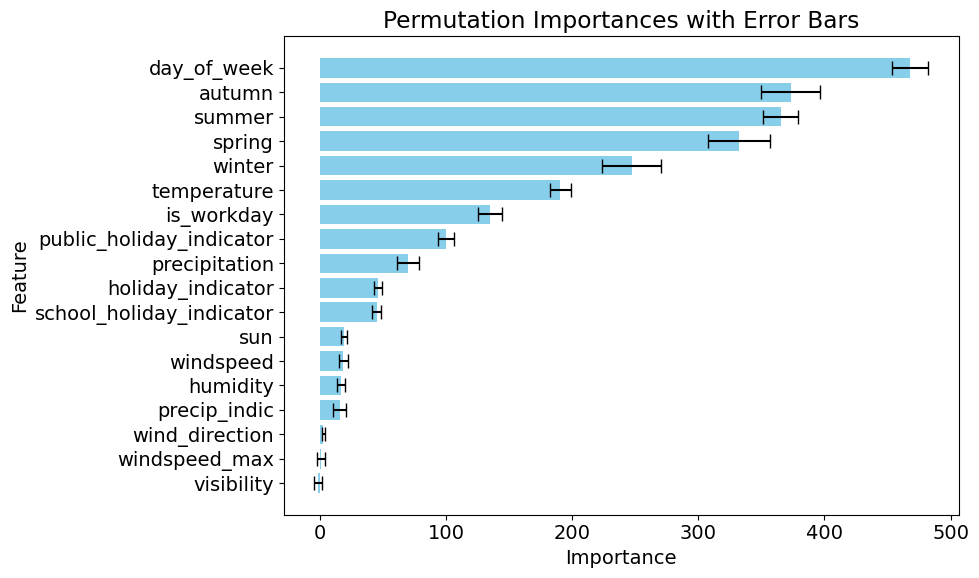

In [43]:
# Plot with error bars
feature_importance = plt.figure(figsize=(10, 6))
plt.barh( importance_df_baseline_model['Feature'], importance_df_baseline_model['Importance'], xerr=importance_df_baseline_model['Std'], color='skyblue', capsize=5 )
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Permutation Importances with Error Bars')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
feature_importance.figure.savefig(base_path_plots / "permutation_importance_baseline_model.png")

## Shap

### Baseline Model
only season data one-hot encoded

In [44]:
shap.initjs()

#### Calculating the Shap values

In [45]:
background_data = shap.sample(X_train_num, 100)

In [46]:
explainer_sample = shap.KernelExplainer(baseline_model.predict, background_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [47]:
shap_values = explainer_sample.shap_values(X_test_num, nsamples=100)

  0%|          | 0/390 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
313/313 ━━━━━

KeyboardInterrupt: 

In [ ]:
shap_values_mu = shap_values[:, :, 0]
shap_values_mu_explanation = shap.Explanation(values=shap_values_mu, data=X_test_num)
shap_values_mu_explanation

.values =
array([[  87.33465576,    0.        ,    0.        , ..., -354.51711048,
        -355.08379224,  443.06402956],
       [  63.49989847,  -46.78169855,   25.97200354, ..., -379.27269886,
        -464.77317972,  331.70305033],
       [-188.41291201,  -15.1415894 ,   85.69541533, ..., -337.03527986,
        -556.02366199,  443.76186153],
       ...,
       [-104.44271489,    0.        , -190.87173519, ..., -375.65115127,
        -416.56188038,  685.35567166],
       [ 144.56518312,    0.        , -240.36445981, ..., -354.36041262,
        -407.10913152,  701.56458583],
       [   0.        ,  -19.12398834,   33.51921773, ..., -372.55582319,
        -483.86218765,  878.36897067]])

.data =
     temperature  humidity  windspeed  wind_direction  visibility  \
0       0.156666 -0.574689  -0.146301        0.435186    1.740197   
1      -0.267002  0.406656  -0.196261        0.386631    1.259373   
2      -0.832871  1.040183  -1.011237        0.313798    0.940566   
3      -0.452449  0.

In [ ]:
print(shap_values_mu_explanation.feature_names)

None


In [ ]:
shap_values_mu_explanation.feature_names = X_train_num.columns.tolist()

In [ ]:
type(shap_values_mu_explanation)

shap._explanation.Explanation

In [ ]:
shap_values_mu_explanation.shape

(390, 18)

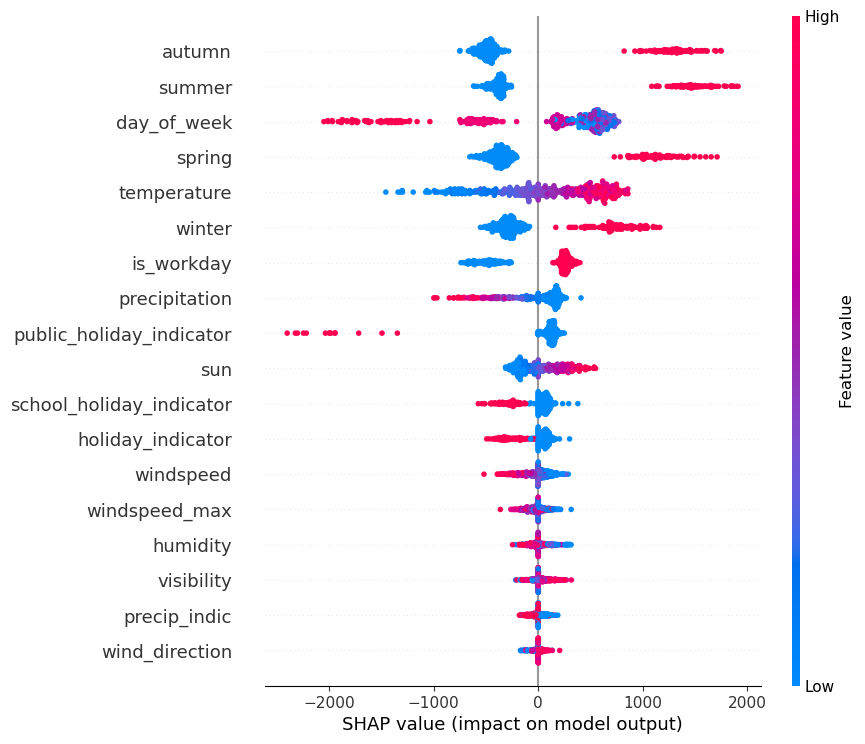

<Figure size 640x480 with 0 Axes>

In [ ]:
beeswarm_plot = shap.plots.beeswarm(shap_values_mu_explanation, max_display=20)
plt.tight_layout()
plt.show()
plt.close()

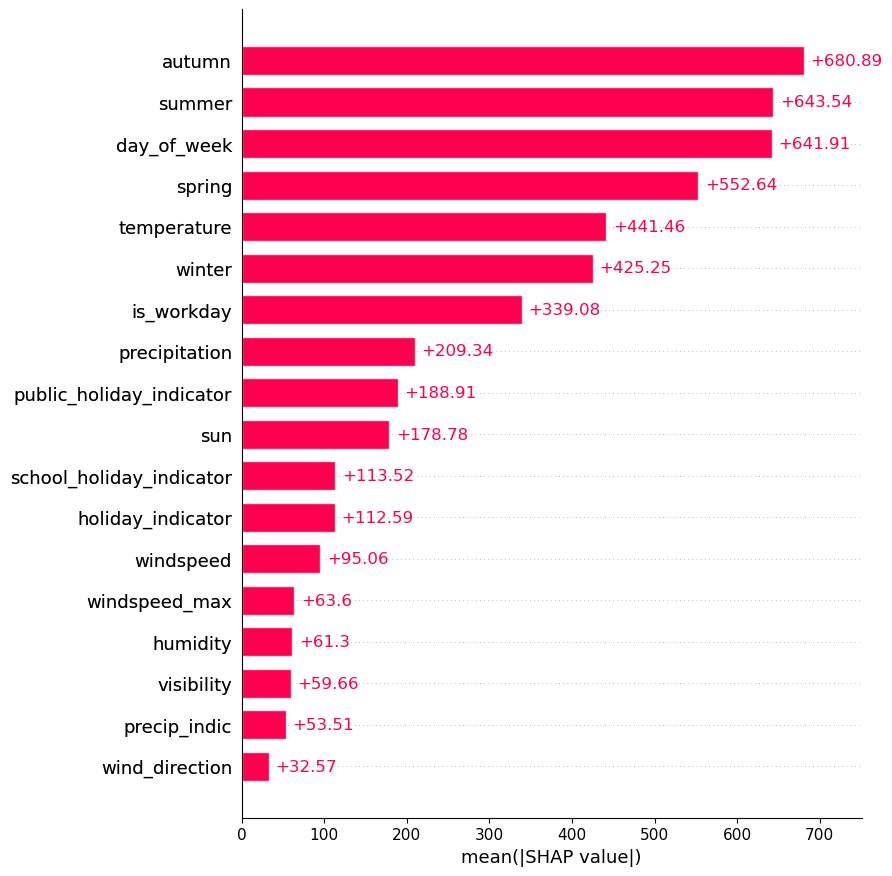

<Figure size 640x480 with 0 Axes>

In [ ]:
shap.plots.bar(shap_values_mu_explanation, max_display=20 )
plt.tight_layout()
plt.show()
plt.close()

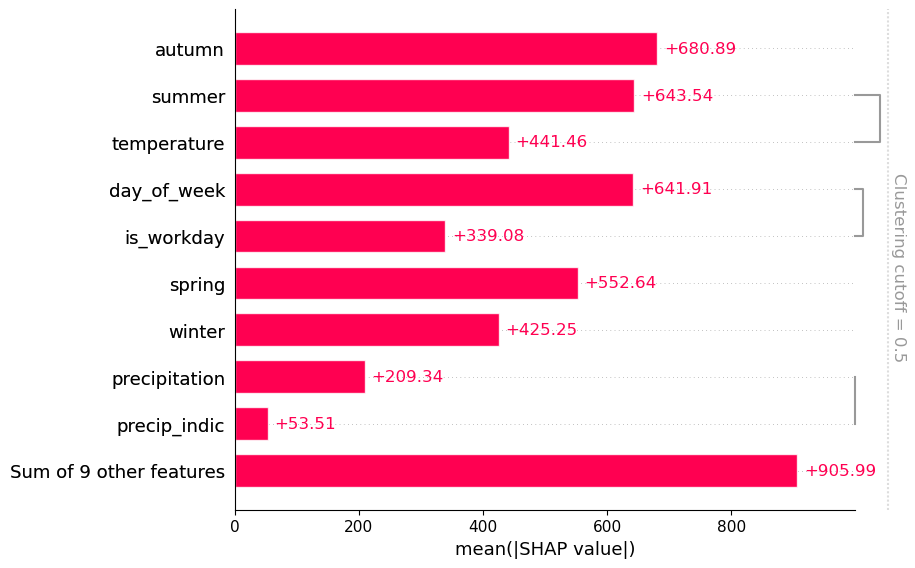

<Figure size 640x480 with 0 Axes>

In [ ]:
clustering = shap.utils.hclust(X_train_num, y_train)
shap.plots.bar(shap_values_mu_explanation, clustering=clustering)
plt.tight_layout()
plt.show()
plt.close()

In [ ]:
shap_values_sigma = shap_values[:, :, 1]
shap_values_sigma_explanation = shap.Explanation(values=shap_values_sigma, data=X_test_num)
shap_values_sigma_explanation

.values =
array([[ 14.26352483,   0.        ,   0.        , ..., -57.90048457,
        -57.99325521,  72.36139707],
       [ 10.37095688,  -7.64039255,   4.24172517, ..., -61.94362418,
        -75.90781693,  54.17432677],
       [-30.77159369,  -2.47269341,  13.99585533, ..., -55.04525639,
        -90.81108624,  72.4761791 ],
       ...,
       [-17.05768038,   0.        , -31.17296977, ..., -61.35216488,
        -68.03396773, 111.93368955],
       [ 23.61049148,   0.        , -39.2557782 , ..., -57.87489802,
        -66.49008174, 114.58104287],
       [  0.        ,  -3.12321854,   5.47425012, ..., -60.8466587 ,
        -79.02568742, 143.45718009]])

.data =
     temperature  humidity  windspeed  wind_direction  visibility  \
0       0.156666 -0.574689  -0.146301        0.435186    1.740197   
1      -0.267002  0.406656  -0.196261        0.386631    1.259373   
2      -0.832871  1.040183  -1.011237        0.313798    0.940566   
3      -0.452449  0.216184   3.104234        0.726518   

In [ ]:
shap_values_sigma_explanation.feature_names = X_train_num.columns.tolist()

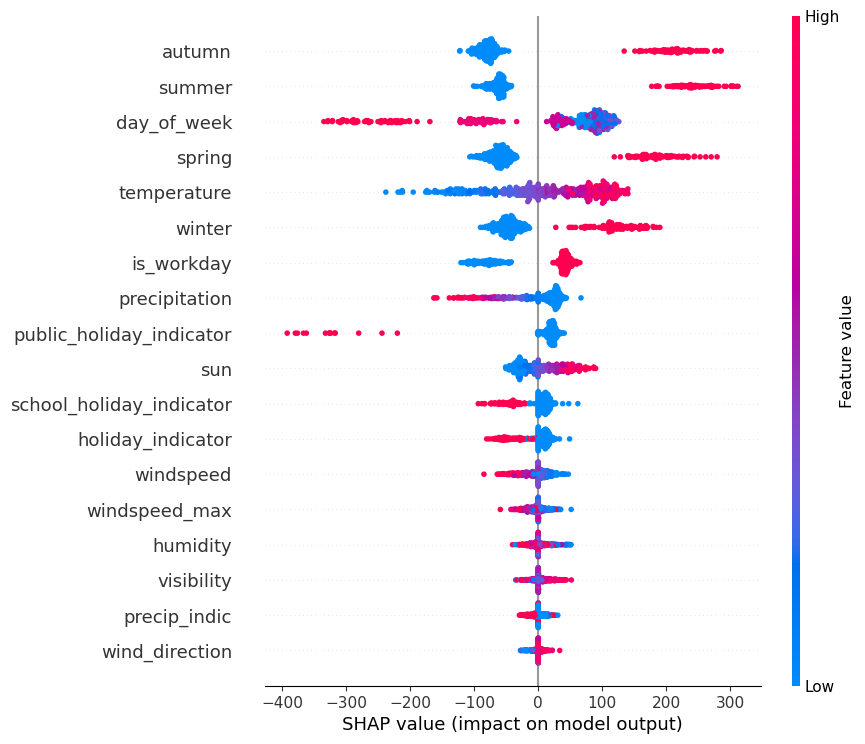

<Figure size 640x480 with 0 Axes>

In [ ]:
beeswarm_plot = shap.plots.beeswarm(shap_values_sigma_explanation, max_display=20)
plt.tight_layout()
plt.show()
plt.close()

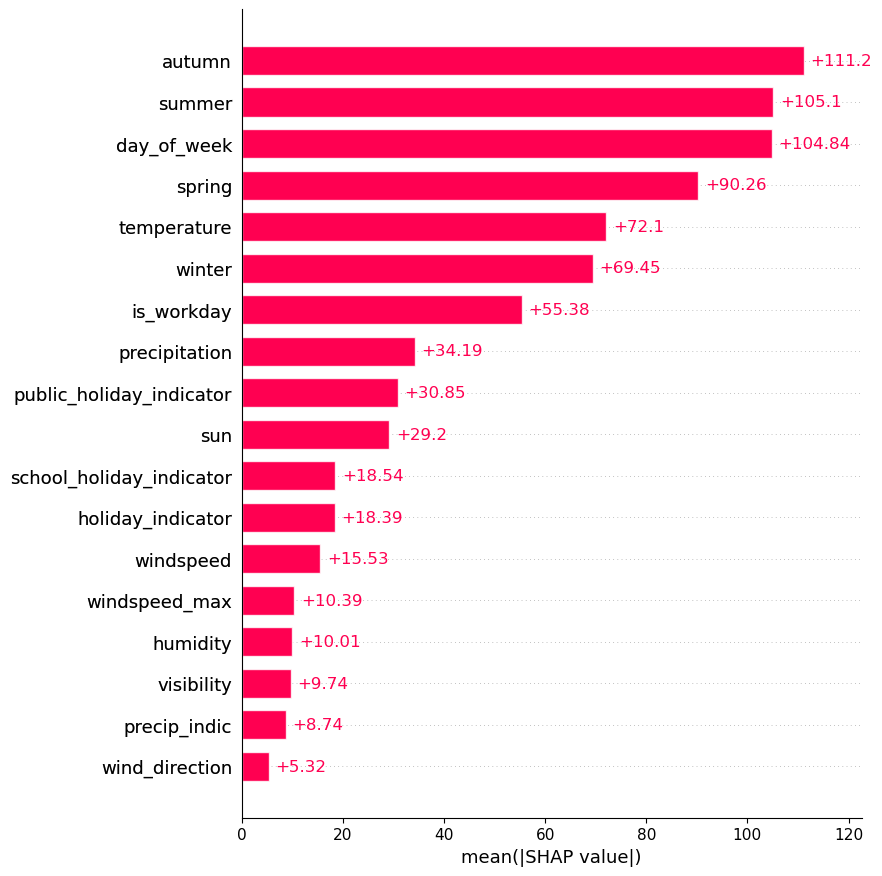

<Figure size 640x480 with 0 Axes>

In [ ]:
shap.plots.bar(shap_values_sigma_explanation, max_display=20 )
plt.tight_layout()
plt.show()
plt.close()

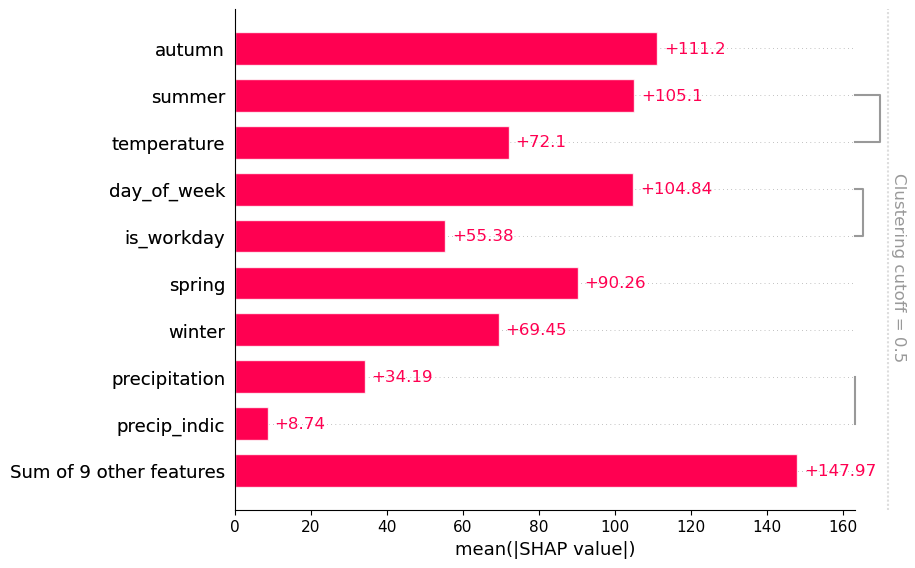

<Figure size 640x480 with 0 Axes>

In [ ]:
clustering = shap.utils.hclust(X_train_num, y_train)
shap.plots.bar(shap_values_sigma_explanation, clustering=clustering)
plt.tight_layout()
plt.show()
plt.close()